In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

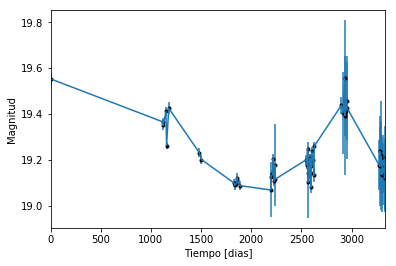

In [2]:
data = np.genfromtxt('LC_19608_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

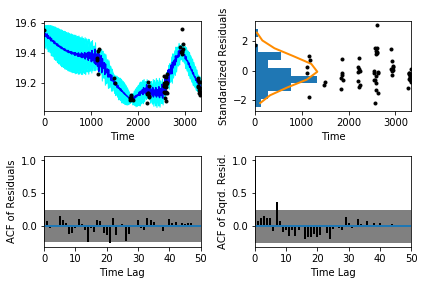

In [5]:
sample.assess_fit()

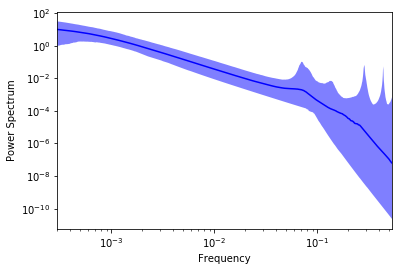

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.767937,'Medida del nivel de ruido')

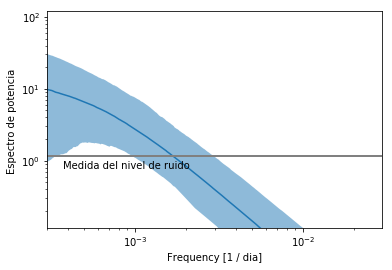

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

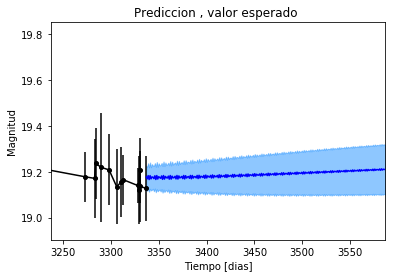

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

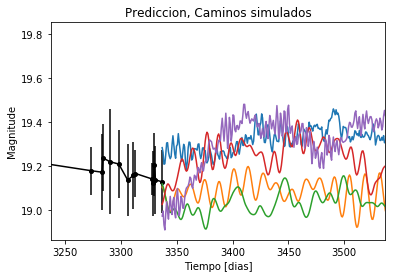

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


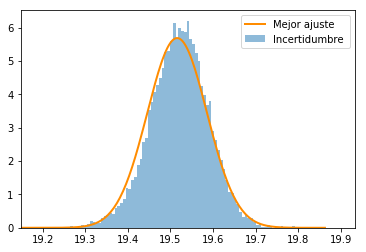

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

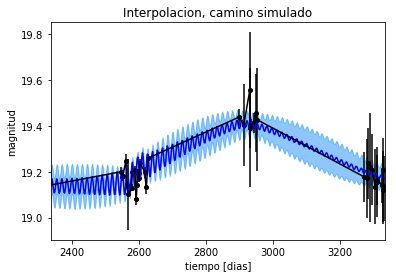

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

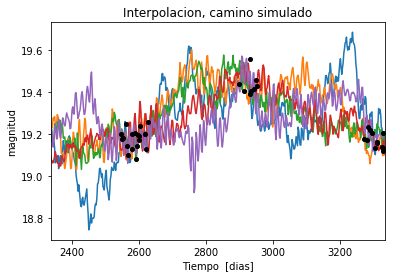

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1888.35982573
Median: 0.00406385152424
Standard deviation: 0.03019434699
68% credibility interval: [ 0.00145442  0.01001875]
95% credibility interval: [ 0.00055478  0.03908068]
99% credibility interval: [ 0.00035312  0.13687353]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2129.39630958
Median: 0.00406338397473
Standard deviation: 0.024585954404
68% credibility interval: [ 0.00145375  0.01001875]
95% credibility interval: [ 0.00055478  0.03906107]
99% credibility interval: [ 0.00035312  0.13507237]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 164.451129399
Median: 0.297762376844
Standard deviation: 0.305989971939
68% cr

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 86.4599310242
Median: 0.149114032969
Standard deviation: 0.261595905479
68% credibility interval: [ 0.07244145  0.56615128]
95% credibility interval: [ 0.06638322  0.93360507]
99% credibility interval: [ 0.05051834  1.06353351]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 86.4599310242
Median: 0.149114032969
Standard deviation: 0.261595905479
68% credibility interval: [ 0.07244145  0.56615128]
95% credibility interval: [ 0.06638322  0.93360507]
99% credibility interval: [ 0.05051834  1.06353351]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 277.8168598
Median: 0.0
Standard deviation: 0.000215433256207
68% credib

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 383.542888698
Median: 99.2101119976
Standard deviation: 2.75002701304
68% credibility interval: [  96.36078112  101.52653395]
95% credibility interval: [  92.99348415  104.24320791]
99% credibility interval: [  90.8380998   105.73776567]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 164.997362535
Median: 1.97506159843
Standard deviation: 1.96719178003
68% credibility interval: [ 0.36282866  4.85833611]
95% credibility interval: [ 0.02158686  6.51660362]
99% credibility interval: [ 0.01899125  6.78951239]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 83.679160112
Median: 1.84065315664
Standard deviation: 9.50004670921
68% credibility interval: [  0.28773769  12.74035635]
95% credibility interval: [  0.19588832  34

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13209.5006651
Median: 8.5320718753e-17
Standard deviation: 7.91884490104e+46
68% credibility interval: [  8.47913500e-51   4.52931045e-01]
95% credibility interval: [  3.20562569e-78   9.47952148e+05]
99% credibility interval: [  2.33976336e-92   1.43595811e+08]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 771.727890236
Median: 19.2786079094
Standard deviation: 0.0716062055065
68% credibility interval: [ 19.21663871  19.34389709]
95% credibility interval: [ 19.13701597  19.42629141]
99% credibility interval: [ 19.05180755  19.49460459]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 86.4599310242
Median: 0.149114032969
Standard deviation: 0.261595905479
68% credibility interval: [ 0.07244145  0.56615128]
95% credibility interval: [ 0.06638322  0.93360507]
99% credibility interval: [ 0.05051834  1.06353351]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 86.4599310242
Median: 0.149114032969
Standard deviation: 0.261595905479
68% credibility interval: [ 0.07244145  0.56615128]
95% credibility interval: [ 0.06638322  0.93360507]
99% credibility interval: [ 0.05051834  1.06353351]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 277.8168598
Median: 0.0
Standard deviation: 0.000215433256207
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 383.542888698
Median: 99.2101119976
Standard deviation: 2.75002701304
68% credibility interval: [  96.36078112  101.52653395]
95% credibility interval: [  92.99348415  104.24320791]
99% credibility interval: [  90.8380998   105.73776567]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 564.600605913
Median: 0.0229398957797
Standard deviation: 0.0133294071767
68% credibility interval: [ 0.01503294  0.03678849]
95% credibility interval: [ 0.01059746  0.06264262]
99% credibility interval: [ 0.0082922   0.08366859]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 329.048868218
Median: 0.851522942752
Standard deviation: 0.170048240211
68% credibility interval: [ 0.70110255  1.0321441 ]
95% credibility interval: [ 0.58838706  1.26342412]
99% credibility interval: [ 0.52597224  1.38911027]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 335.450959363
Median: 0.0115771057788
Standard deviation: 0.40322991319
68% credibility interval: [ 0.00125237  0.23928513]
95% credibility interval: [  2.70722704e-07   1.51789281e+00]
99% credibility interval: [  7.95233035e-10   2.69390404e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1888.35982573
Median: (-0.0255339321877-0.462584731856j)
Standard deviation: 1.65456821673
68% credibility interval: [-0.06294964-0.53111231j -0.00913840-2.33532387j]
95% credibility interval: [-0.24555115-1.61563173j -0.00348580-0.44085045j]
99% credibility interval: [-0.86000178-5.36362786j -0.00221871-0.44514547j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2129.39630958
Median: (-0.0255309944875+0.583693266064j)
Standard deviation: 1.65089886178
68% credibility interval: [-0.06294964+0.53111231j -0.00913419+0.48314009j]
95% credibility interval: [-0.24542793+1.05645009j -0.00348580+0.44085045j]
99% credibility interval: [-0.84868473+4.39001691j -0.00221871+0.44514547j]
Posterior summary for parameter ar_roots  